In [1]:
from typing import TypedDict

from langgraph.graph import END, START, StateGraph

In [2]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float             # Strike Rate
    bpb: float            # Balls per boundary
    boundary_percent: float
    summary: str

In [3]:
def caculate_sr(state: BatsmanState) -> BatsmanState:
    sr = (state["runs"] / state["balls"]) * 100
    return {"sr": sr}


def caculate_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state["balls"] / (state["fours"] + state["sixes"])
    return {"bpb": bpb}


def caculate_boundary_percent(state: BatsmanState) -> BatsmanState:
    boundary_percent = (
        ((state["fours"] * 4) + (state["sixes"] * 6)) / state["runs"]
    ) * 100
    return {"boundary_percent": boundary_percent}


def summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""

    return {"summary": summary}

In [4]:
# declare graph
graph = StateGraph(BatsmanState)


# add nodes
graph.add_node('caculate_sr', caculate_sr)
graph.add_node('caculate_bpb', caculate_bpb)
graph.add_node('caculate_boundary_percent', caculate_boundary_percent)
graph.add_node('summary', summary)


# add edges
graph.add_edge(START, 'caculate_sr')
graph.add_edge(START, 'caculate_bpb')
graph.add_edge(START, 'caculate_boundary_percent')

graph.add_edge('caculate_sr', 'summary')
graph.add_edge('caculate_bpb', 'summary')
graph.add_edge('caculate_boundary_percent', 'summary')

graph.add_edge('summary', END)


# compile
workflow = graph.compile()

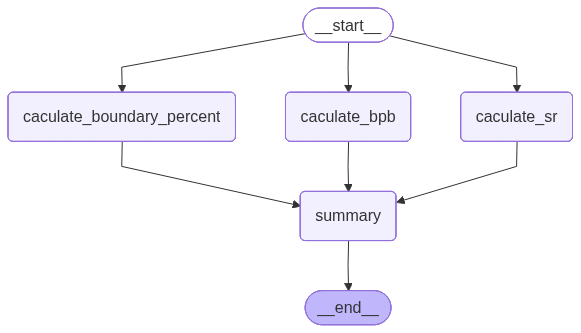

In [5]:
workflow

In [6]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4,
}

final_state = workflow.invoke(initial_state)
final_state

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}